In [40]:
import pandas as pd

# Load the CSV file
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,temp,wx_icon,icon_extd,...,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,VVTS,observation,1577818800,VVTS,Ho Chi Minh City,1577811600,N,79.0,33,3300,...,FEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VVTS,observation,1577820600,VVTS,Ho Chi Minh City,1577813400,N,79.0,33,3300,...,FEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VVTS,observation,1577822400,VVTS,Ho Chi Minh City,1577815200,N,79.0,33,3300,...,FEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VVTS,observation,1577824200,VVTS,Ho Chi Minh City,1577817000,N,79.0,33,3300,...,FEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VVTS,observation,1577826000,VVTS,Ho Chi Minh City,1577818800,N,77.0,33,3300,...,FEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Check for missing values
missing_values = data.isnull().sum()

# Check data types
data_types = data.dtypes

# Display the missing values and data types
missing_values, data_types

(key                              0
 class                            0
 expire_time_gmt                  0
 obs_id                           0
 obs_name                         0
 valid_time_gmt                   0
 day_ind                          0
 temp                            12
 wx_icon                          0
 icon_extd                        0
 wx_phrase                        0
 pressure_tend                77750
 pressure_desc                77750
 dewPt                           18
 heat_index                      18
 rh                              18
 pressure                        29
 vis                              0
 wc                              17
 wdir                         19382
 wdir_cardinal                    6
 gust                         77271
 wspd                             6
 max_temp                     77750
 min_temp                     77750
 precip_total                 77750
 precip_hrly                  77750
 snow_hrly                  

In [45]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Drop columns with more than 90% missing values
columns_to_drop = missing_percentage[missing_percentage > 90].index
data_cleaned = data.drop(columns=columns_to_drop)

# Display the columns that were dropped
columns_to_drop

Index(['pressure_tend', 'pressure_desc', 'gust', 'max_temp', 'min_temp',
       'precip_total', 'precip_hrly', 'snow_hrly', 'qualifier',
       'qualifier_svrty', 'blunt_phrase', 'terse_phrase', 'water_temp',
       'primary_wave_period', 'primary_wave_height', 'primary_swell_period',
       'primary_swell_height', 'primary_swell_direction',
       'secondary_swell_period', 'secondary_swell_height',
       'secondary_swell_direction'],
      dtype='object')

In [46]:
# Convert timestamp columns to datetime objects
data_cleaned['DateTime'] = pd.to_datetime(data_cleaned['valid_time_gmt'], unit='s') + pd.Timedelta(hours=7)
data_cleaned = data_cleaned.drop(columns=['valid_time_gmt', 'expire_time_gmt'])

data_cleaned

,key,class,obs_id,obs_name,day_ind,temp,wx_icon,icon_extd,wx_phrase,dewPt,...,vis,wc,wdir,wdir_cardinal,wspd,uv_desc,feels_like,uv_index,clds,DateTime
0,VVTS,observation,VVTS,Ho Chi Minh City,N,79.0,33,3300,Fair,66.0,...,6.0,79.0,50.0,NE,5.0,Low,81.0,0.0,FEW,2020-01-01 00:00:00
1,VVTS,observation,VVTS,Ho Chi Minh City,N,79.0,33,3300,Fair,68.0,...,6.0,79.0,NaN,VAR,5.0,Low,81.0,0.0,FEW,2020-01-01 00:30:00
2,VVTS,observation,VVTS,Ho Chi Minh City,N,79.0,33,3300,Fair,70.0,...,6.0,79.0,10.0,N,6.0,Low,81.0,0.0,FEW,2020-01-01 01:00:00
3,VVTS,observation,VVTS,Ho Chi Minh City,N,79.0,33,3300,Fair,70.0,...,4.0,79.0,20.0,NNE,6.0,Low,81.0,0.0,FEW,2020-01-01 01:30:00
4,VVTS,observation,VVTS,Ho Chi Minh City,N,77.0,33,3300,Fair,68.0,...,4.0,77.0,20.0,NNE,6.0,Low,79.0,0.0,FEW,2020-01-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77745,VVTS,observation,VVTS,Ho Chi Minh City,N,84.0,29,2900,Partly Cloudy,81.0,...,6.0,84.0,220.0,SW,9.0,Low,98.0,0.0,SCT,2024-06-17 21:30:00
77746,VVTS,observation,VVTS,Ho Chi Minh City,N,84.0,29,2900,Partly Cloudy,81.0,...,6.0,84.0,230.0,SW,8.0,Low,98.0,0.0,SCT,2024-06-17 22:00:00
77747,VVTS,observation,VVTS,Ho Chi Minh City,N,84.0,29,2900,Partly Cloudy,81.0,...,6.0,84.0,240.0,WSW,8.0,Low,98.0,0.0,SCT,2024-06-17 22:30:00
77748,VVTS,observation,VVTS,Ho Chi Minh City,N,82.0,29,2900,Partly Cloudy,81.0,...,6.0,82.0,220.0,SW,8.0,Low,94.0,0.0,SCT,2024-06-17 23:00:00


In [47]:
# Impute missing values for numerical columns with mean
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].fillna(data_cleaned[numeric_columns].mean())

# Impute missing values for categorical columns with mode
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].mode()[0])

# Verify there are no missing values left
missing_values_after_imputation = data_cleaned.isnull().sum()
missing_values_after_imputation

key              0
class            0
obs_id           0
obs_name         0
day_ind          0
temp             0
wx_icon          0
icon_extd        0
wx_phrase        0
dewPt            0
heat_index       0
rh               0
pressure         0
vis              0
wc               0
wdir             0
wdir_cardinal    0
wspd             0
uv_desc          0
feels_like       0
uv_index         0
clds             0
DateTime         0
dtype: int64

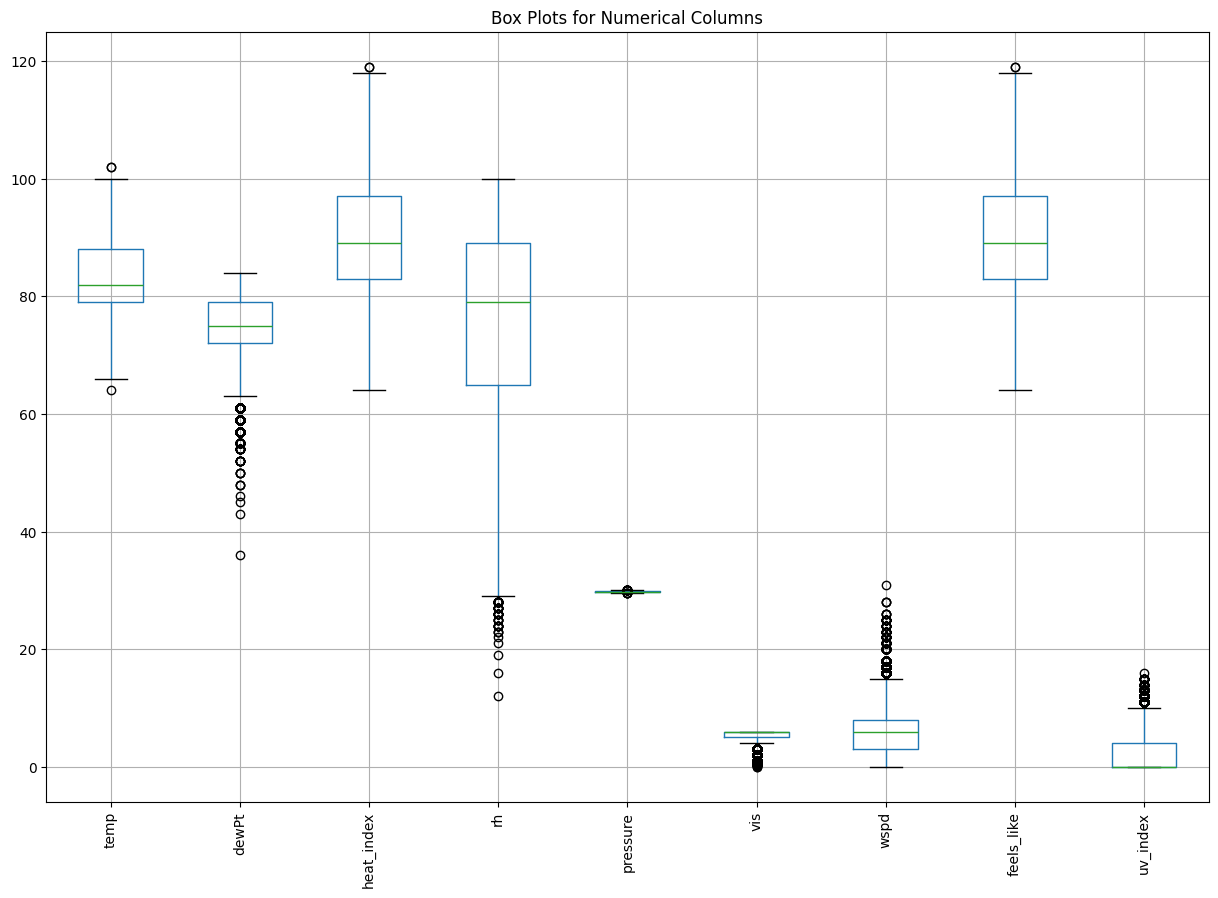

In [49]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = ['temp', 'dewPt', 'heat_index', 'rh', 'pressure', 'vis', 'wspd', 'feels_like', 'uv_index']

# Plot box plots for numerical columns
plt.figure(figsize=(15, 10))
data_cleaned[numerical_columns].boxplot()
plt.xticks(rotation=90)
plt.title("Box Plots for Numerical Columns")
plt.show()

In [50]:
# Check for duplicate records
duplicates = data_cleaned.duplicated().sum()

# Remove duplicates if any
data_cleaned = data_cleaned.drop_duplicates()

# Display the number of duplicates found and the first few rows of the cleaned dataset
duplicates, data_cleaned.head()

(0,
     key        class obs_id          obs_name day_ind  temp  wx_icon  \
 0  VVTS  observation   VVTS  Ho Chi Minh City       N  79.0       33   
 1  VVTS  observation   VVTS  Ho Chi Minh City       N  79.0       33   
 2  VVTS  observation   VVTS  Ho Chi Minh City       N  79.0       33   
 3  VVTS  observation   VVTS  Ho Chi Minh City       N  79.0       33   
 4  VVTS  observation   VVTS  Ho Chi Minh City       N  77.0       33   
 
    icon_extd wx_phrase  dewPt  ...  vis    wc        wdir  wdir_cardinal  \
 0       3300      Fair   66.0  ...  6.0  79.0   50.000000             NE   
 1       3300      Fair   68.0  ...  6.0  79.0  184.717825            VAR   
 2       3300      Fair   70.0  ...  6.0  79.0   10.000000              N   
 3       3300      Fair   70.0  ...  4.0  79.0   20.000000            NNE   
 4       3300      Fair   68.0  ...  4.0  77.0   20.000000            NNE   
 
    wspd  uv_desc feels_like  uv_index clds            DateTime  
 0   5.0      Low       81

In [52]:
# Consistency Check: Ensure temperatures are within realistic range
temperature_range = (data_cleaned['temp'].min(), data_cleaned['temp'].max())

# Statistical Summaries
stat_summary = data_cleaned.describe()

# Display the results
temperature_range, stat_summary

((64.0, 102.0),
                temp       wx_icon     icon_extd         dewPt    heat_index  \
 count  77750.000000  77750.000000  77750.000000  77750.000000  77750.000000   
 mean      83.457267     28.770354   2875.646096     74.561300     90.171345   
 min       64.000000      4.000000    400.000000     36.000000     64.000000   
 25%       79.000000     28.000000   2800.000000     72.000000     83.000000   
 50%       82.000000     29.000000   2900.000000     75.000000     89.000000   
 75%       88.000000     30.000000   3000.000000     79.000000     97.000000   
 max      102.000000     47.000000   3849.000000     84.000000    119.000000   
 std        5.382156      5.496790    538.894645      4.922229      9.008335   
 
                  rh      pressure           vis            wc          wdir  \
 count  77750.000000  77750.000000  77750.000000  77750.000000  77750.000000   
 mean      76.643519     29.764559      5.423162     83.457167    184.717825   
 min       12.000000  